In [6]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Win 10\Downloads\traffic project\traffic accident.csv")


In [7]:
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,3,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,2,0,1,8
2,12-09-2021 10:30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,3,10,5,12
3,08-09-2023 19:55,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5,0,0,5,0,0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0,0,0,0,0,3,14,7,8


In [4]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to all object (categorical) columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [5]:
df = pd.get_dummies(df, drop_first=True)


In [6]:
df

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,102748,16,2,3,17,8,3,5,5,1,...,2,0,0,0,0,0,3,13,7,7
1,110797,16,2,1,17,6,3,0,1,1,...,2,0,0,0,0,0,2,0,1,8
2,176825,16,2,3,10,15,3,0,1,1,...,2,0,0,0,0,0,3,10,5,12
3,108630,16,2,3,0,6,3,0,1,0,...,3,5,0,0,5,0,0,19,4,8
4,113911,16,2,3,10,15,3,5,5,1,...,2,0,0,0,0,0,3,14,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,127603,17,11,5,17,6,3,5,5,1,...,2,0,0,0,0,0,2,13,4,9
209302,96972,17,2,3,15,8,3,0,1,1,...,2,0,0,0,0,0,2,14,3,7
209303,150516,16,2,3,9,2,4,0,1,0,...,1,2,0,2,0,0,0,13,4,10
209304,71995,4,2,3,9,15,3,0,1,0,...,3,1,0,0,1,0,1,15,2,6


In [7]:
df['most_severe_injury'].value_counts()

most_severe_injury
2    154789
3     31527
4     16075
1      6564
0       351
Name: count, dtype: int64

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv(r"C:\Users\Win 10\Downloads\traffic project\traffic accident.csv")
# Define features and numeric target
features = [
    'weather_condition', 'lighting_condition', 'first_crash_type',
    'roadway_surface_cond', 'crash_day_of_week', 'crash_month'
]
target = 'crash_hour'  # Example numeric target for regression

# Drop rows with missing values
df_model = df[features + [target]].dropna()

# Encode categorical variables
le_dict = {}
for col in features:
    if df_model[col].dtype == 'object':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])
        le_dict[col] = le

# Split into training and testing
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict
y_pred = reg_model.predict(X_test)

# Evaluate
print("📉 Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("📈 R-squared (R² Score):", r2_score(y_test, y_pred))

# Show first 10 predictions
comparison = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10]})
print("\n🔍 Actual vs Predicted crash_hour:")
print(comparison)


📉 Mean Squared Error (MSE): 30.571034147490995
📈 R-squared (R² Score): 0.022493748774294442

🔍 Actual vs Predicted crash_hour:
   Actual  Predicted
0      15  13.586314
1      11  13.248859
2      10  12.777052
3      15  13.072692
4      13  13.081772
5      15  12.779373
6      15  12.955475
7      21  14.483082
8      11  12.536513
9      13  12.676891


### Decision Tree

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv(r"C:\Users\Win 10\Downloads\traffic project\traffic accident.csv")
# Choose features and numeric target variable
features = [
    'weather_condition', 'lighting_condition', 'first_crash_type',
    'roadway_surface_cond', 'crash_day_of_week', 'crash_month'
]
target = 'crash_hour'  # Replace this if you have another numeric column

# Drop rows with missing values
df_model = df[features + [target]].dropna()

# Encode categorical features
label_encoders = {}
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])
        label_encoders[col] = le

# Split into training and testing sets
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("📉 Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("📈 R-squared (R² Score):", r2_score(y_test, y_pred))

# Show some predictions
comparison = pd.DataFrame({'Actual': y_test.values[:10], 'Predicted': y_pred[:10]})
print("\n🔍 Actual vs Predicted crash_hour:")
print(comparison)


📉 Mean Squared Error (MSE): 31.45310007053693
📈 R-squared (R² Score): -0.00571023508868973

🔍 Actual vs Predicted crash_hour:
   Actual  Predicted
0      15  13.762162
1      11  12.833333
2      10   7.000000
3      15  12.318966
4      13  13.581818
5      15  11.333333
6      15  12.911585
7      21  17.193548
8      11  12.574257
9      13  13.457143


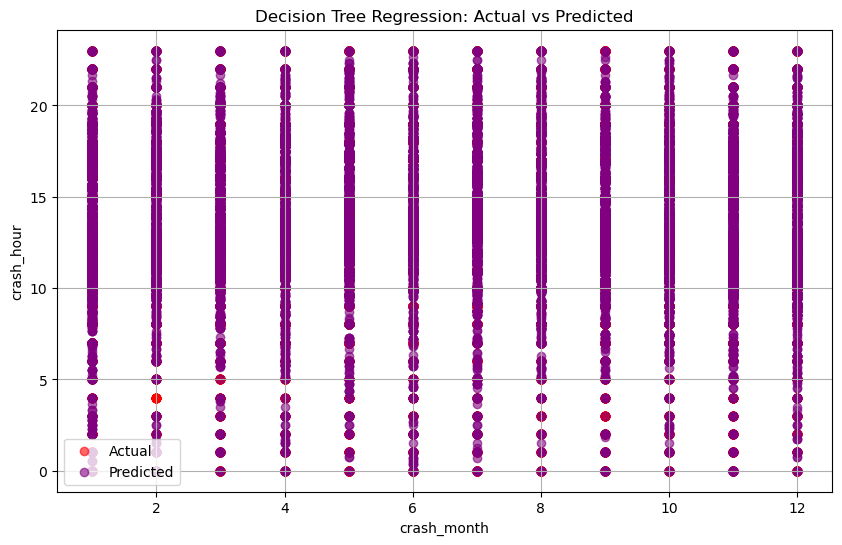

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

# Load and prepare data
df = pd.read_csv(r"C:\Users\Win 10\Downloads\traffic project\traffic accident.csv")

# Choose features and target
features = [
    'weather_condition', 'lighting_condition', 'first_crash_type',
    'roadway_surface_cond', 'crash_day_of_week', 'crash_month'
]
target = 'crash_hour'

df_model = df[features + [target]].dropna()

# Encode categorical features
for col in features:
    if df_model[col].dtype == 'object':
        df_model[col] = LabelEncoder().fit_transform(df_model[col])

# Split dataset
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Choose one feature for x-axis in scatter plot (e.g., 'crash_month')
x_feature_name = 'crash_month'
x_index = features.index(x_feature_name)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, x_index], y_test, color='red', label='Actual', alpha=0.6)
plt.scatter(X_test.iloc[:, x_index], y_pred, color='purple', label='Predicted', alpha=0.6)
plt.xlabel(x_feature_name)
plt.ylabel(target)
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


### KNN

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"C:\Users\Win 10\Downloads\traffic project\traffic accident.csv")

# Select features and numeric target variable
features = [
    'weather_condition', 'lighting_condition', 'first_crash_type',
    'roadway_surface_cond', 'crash_day_of_week', 'crash_month'
]
target = 'crash_hour'  # Numeric target

# Drop rows with missing values
df_model = df[features + [target]].dropna()

# Encode categorical features
label_encoders = {}
for col in features:
    if df_model[col].dtype == 'object':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])
        label_encoders[col] = le

# Feature and target separation
X = df_model[features]
y = df_model[target]

# Scale features (KNN requires scaling for distance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on test data
y_pred = knn_model.predict(X_test)

# Evaluation
print("📉 Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("📈 R-squared (R² Score):", r2_score(y_test, y_pred))

# Show some actual vs predicted
comparison = pd.DataFrame({'Actual': y_test.values[:10], 'Predicted': y_pred[:10]})
print("\n🔍 Actual vs Predicted crash_hour:")
print(comparison)


📉 Mean Squared Error (MSE): 33.47780516936601
📈 R-squared (R² Score): -0.07045001070260759

🔍 Actual vs Predicted crash_hour:
   Actual  Predicted
0      15       15.4
1      11       13.0
2      10       13.0
3      15       13.2
4      13       14.8
5      15       13.2
6      15       11.8
7      21       13.2
8      11       14.0
9      13       14.8


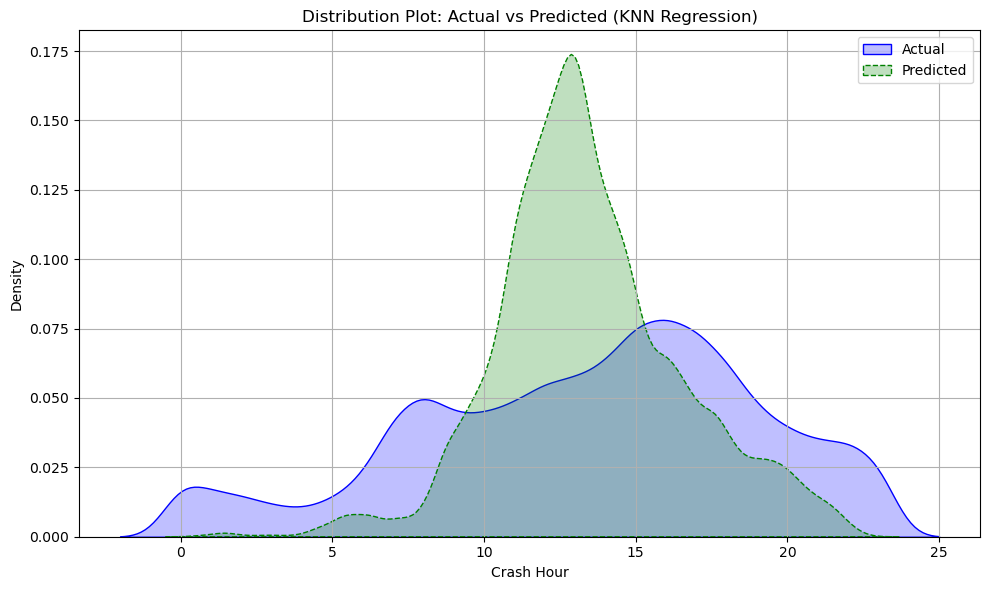

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Load dataset
df = pd.read_csv(r"C:\Users\Win 10\Downloads\traffic project\traffic accident.csv")
# Select features and target
features = [
     'weather_condition', 'lighting_condition', 'first_crash_type',
    'roadway_surface_cond', 'crash_day_of_week', 'crash_month'
]
target = 'crash_hour'

df_model = df[features + [target]].dropna()

# Encode categorical variables
for col in features:
    if df_model[col].dtype == 'object':
        df_model[col] = LabelEncoder().fit_transform(df_model[col])

# Prepare data
X = df_model[features]
y = df_model[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN Regressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot distribution of actual vs predicted
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', fill=True, color='blue')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='green', linestyle='--')
plt.title('Distribution Plot: Actual vs Predicted (KNN Regression)')
plt.xlabel('Crash Hour')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Naive Bayes

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv(r"C:\Users\Win 10\Downloads\traffic project\traffic accident.csv")
# Select features and target
features = [
     'weather_condition', 'lighting_condition', 'first_crash_type',
    'roadway_surface_cond', 'crash_day_of_week', 'crash_month'
]
target = 'crash_hour'
# Drop rows with missing values
df_model = df[features + [target]].dropna()

# Encode categorical data
label_encoders = {}
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])
        label_encoders[col] = le

# Split dataset
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred = nb_model.predict(X_test)

# Decode predictions and true values if needed
if target in label_encoders:
    y_test_decoded = label_encoders[target].inverse_transform(y_test)
    y_pred_decoded = label_encoders[target].inverse_transform(y_pred)
else:
    y_test_decoded = y_test
    y_pred_decoded = y_pred

# === ✅ Generate Report === #
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

print("\n📋 Classification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("\n✅ Accuracy Score:")
print(accuracy_score(y_test_decoded, y_pred_decoded))


📊 Confusion Matrix:
[[249   0   4   0   0   0   0   0   3   0   0   0   0   2   1   0  12  17
   15   0  15 176 206 200]
 [189   0   6   0   0   0   0   0   4   0   0   0   0   4   4   2   6  12
   13   0  10 134 123 197]
 [174   0   6   0   0   0   0   0   1   0   0   0   0   2   4   5   9   8
   14   0   6 124 100 177]
 [143   0   7   0   0   0   0   0   2   0   0   0   0   2   4   2   3  13
    5   0   6 102  59 138]
 [ 96   0   0   0   0   0   0   0   3   0   0   0   0   4   6   6   6  34
    8   0   5  78  56 110]
 [ 43   0   3   0   0   0   0   1  27   0   0   0   0  26  36  25  13 131
   28   0  14 108  57  64]
 [ 12   0   0   0   0   0   0   5 190   0   0   0   0  81 164 103  14 174
   23   0   8  77  28  28]
 [  1   0   0   0   0   0   0  16 685   0   0   0   0 227 421 396   3  63
   20   0   2  11   6   5]
 [  0   0   0   0   0   0   0  20 882   0   0   0   0 283 518 479   2  29
    6   0   1   7   8   4]
 [  0   0   0   0   0   0   0  16 670   0   0   0   0 292 426 369   2  

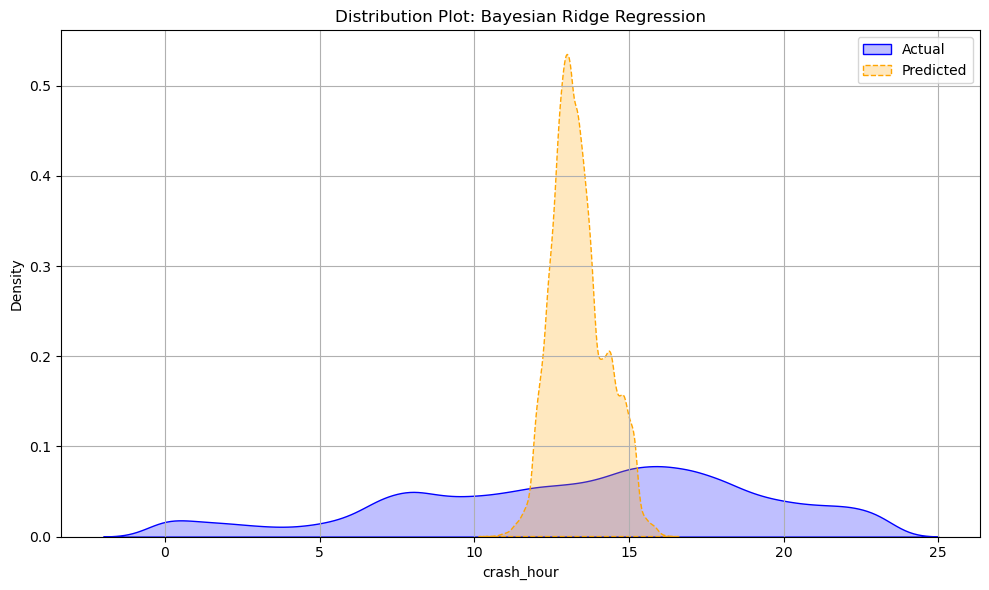

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import BayesianRidge

# Load dataset
df = pd.read_csv(r"C:\Users\Win 10\Downloads\traffic project\traffic accident.csv")

# Select features and numeric target
features = [
    'weather_condition', 'lighting_condition', 'first_crash_type',
    'roadway_surface_cond', 'crash_day_of_week', 'crash_month'
]
target = 'crash_hour'

df_model = df[features + [target]].dropna()

# Encode categorical features
for col in features:
    if df_model[col].dtype == 'object':
        df_model[col] = LabelEncoder().fit_transform(df_model[col])

# Prepare data
X = df_model[features]
y = df_model[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Bayesian Ridge Regression model
model = BayesianRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', fill=True, color='blue')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='orange', linestyle='--')
plt.title('Distribution Plot: Bayesian Ridge Regression')
plt.xlabel('crash_hour')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\Users\Win 10\Downloads\traffic project\traffic accident.csv")

# Create a dictionary for the new row
new_row = {
    'crash_date':'07/12/2023',
    'traffic_control_device':'NO CONTROL',
    'weather_condition': 'CLEAR',
    'lighting_condition': 'DAYLIGHT',
    'first_crash_type': 'REAR END',
    'trafficway_type':'FOUR WAY',
    'roadway_surface_cond': 'DRY',
    'road_defect':'WET',
    'crash_type':'INJURY AND / OR TOW DUE TO CRASH',
    'most_severe_injury	':'INCAPACITATING INJURY',
    'injuries_total':'5.1',
    'injuries_fatal':'6.2',
    'injuries_incapacitating':'4.4',
    'injuries_non_incapacitating':'6.0',
    'alignment':'STRAIGHT AND LEVEL',
    'crash_day_of_week': 5,
    'crash_month': 6,
    'crash_hour': 14
}

# Append the new row
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Optional: Save to a new CSV
df.to_csv("traffic_accident_updated.csv", index=False)

# Confirm row was added
print(df.tail())


                    crash_date traffic_control_device weather_condition  \
209302  07/18/2023 02:10:00 PM                UNKNOWN             CLEAR   
209303  10/23/2019 01:32:00 PM         TRAFFIC SIGNAL             CLEAR   
209304        06-01-2020 15:23            NO CONTROLS             CLEAR   
209305  12/16/2022 12:10:00 PM         TRAFFIC SIGNAL             CLEAR   
209306              07/12/2023             NO CONTROL             CLEAR   

       lighting_condition          first_crash_type  \
209302           DAYLIGHT  SIDESWIPE SAME DIRECTION   
209303           DAYLIGHT                PEDESTRIAN   
209304           DAYLIGHT                PEDESTRIAN   
209305           DAYLIGHT                   TURNING   
209306           DAYLIGHT                  REAR END   

                        trafficway_type           alignment  \
209302                      NOT DIVIDED  STRAIGHT AND LEVEL   
209303  DIVIDED - W/MEDIAN (NOT RAISED)   STRAIGHT ON GRADE   
209304                   T-IN

In [18]:
df


,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,most_severe_injury\t
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0,0,0,0,0.0,3.0,13,7,7,NaN
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0,0,0,0,0.0,2.0,0,1,8,NaN
2,12-09-2021 10:30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0,0,0,0,0.0,3.0,10,5,12,NaN
3,08-09-2023 19:55,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,5,0,0,5,0.0,0.0,19,4,8,NaN
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0,0,0,0,0.0,3.0,14,7,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0,0,0,0,0.0,2.0,14,3,7,NaN
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2,0,2,0,0.0,0.0,13,4,10,NaN
209304,06-01-2020 15:23,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,1,0,0,1,0.0,1.0,15,2,6,NaN
209305,12/16/2022 12:10:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,FOUR WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0,0,0,0,0.0,2.0,12,6,12,NaN


In [26]:
updated_path =("C:/Users/Win 10/Downloads/traffic project/traffic accident.csv1")
df.to_csv(updated_path, index=False)
updated_path

'C:/Users/Win 10/Downloads/traffic project/traffic accident.csv1'

In [25]:
df.tail(1)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,most_severe_injury\t
209306,07/12/2023,NO CONTROL,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,WET,INJURY AND / OR TOW DUE TO CRASH,...,5.1,6.2,4.4,6.0,NaN,NaN,14,5,6,INCAPACITATING INJURY
